In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the requests library.
import requests

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | duldurga
Processing Record 2 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 3 of Set 1 | coihaique
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | wewak
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | cayenne
Processing Record 9 of Set 1 | warrnambool
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | syke
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | yar-sale
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 21 of Set 1 | lompoc
Proce

Processing Record 37 of Set 4 | gat
Processing Record 38 of Set 4 | fortuna
Processing Record 39 of Set 4 | huarmey
Processing Record 40 of Set 4 | karamea
City not found. Skipping...
Processing Record 41 of Set 4 | shelburne
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | yabelo
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | santa lucia
Processing Record 46 of Set 4 | chagda
City not found. Skipping...
Processing Record 47 of Set 4 | waitati
Processing Record 48 of Set 4 | huadian
Processing Record 49 of Set 4 | asau
Processing Record 50 of Set 4 | cloquet
Processing Record 1 of Set 5 | muscat
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | el alto
Processing Record 4 of Set 5 | lianran
Processing Record 5 of Set 5 | kisangani
Processing Record 6 of Set 5 | drayton valley
Processing Record 7 of Set 5 | dingle
Processing Record 8 of Set 5 | coahuayana
Processing Record

Processing Record 22 of Set 8 | hovd
Processing Record 23 of Set 8 | bellefontaine
Processing Record 24 of Set 8 | banepa
Processing Record 25 of Set 8 | varhaug
Processing Record 26 of Set 8 | camacha
Processing Record 27 of Set 8 | kroya
Processing Record 28 of Set 8 | rincon
Processing Record 29 of Set 8 | quatre cocos
Processing Record 30 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 31 of Set 8 | sayyan
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | trujillo
Processing Record 34 of Set 8 | morant bay
Processing Record 35 of Set 8 | rivera
Processing Record 36 of Set 8 | komsomolskiy
Processing Record 37 of Set 8 | avdon
Processing Record 38 of Set 8 | sao joao da barra
Processing Record 39 of Set 8 | san quintin
Processing Record 40 of Set 8 | saint-augustin
Processing Record 41 of Set 8 | semnan
Processing Record 42 of Set 8 | tilichiki
Processing Record 43 of Set 8 | tsiroanomandidy
Processing Record 44 of Set 8 | chandauli
Process

Processing Record 5 of Set 12 | camaqua
Processing Record 6 of Set 12 | ban nahin
Processing Record 7 of Set 12 | buraydah
Processing Record 8 of Set 12 | davila
Processing Record 9 of Set 12 | zeya
Processing Record 10 of Set 12 | richards bay
Processing Record 11 of Set 12 | san isidro
Processing Record 12 of Set 12 | nordby
Processing Record 13 of Set 12 | qasigiannguit
Processing Record 14 of Set 12 | balangir
Processing Record 15 of Set 12 | connersville
Processing Record 16 of Set 12 | melilla
Processing Record 17 of Set 12 | kermanshah
Processing Record 18 of Set 12 | afrikanda
Processing Record 19 of Set 12 | qaqortoq
Processing Record 20 of Set 12 | el bordo
Processing Record 21 of Set 12 | rock springs
Processing Record 22 of Set 12 | broken hill
Processing Record 23 of Set 12 | gao
Processing Record 24 of Set 12 | winnemucca
Processing Record 25 of Set 12 | hokitika
Processing Record 26 of Set 12 | khandyga
Processing Record 27 of Set 12 | arani
Processing Record 28 of Set 1

In [8]:
len(city_data)

559

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Duldurga,50.6761,113.5931,19.60,75,56,27.16,RU,2021-10-14 18:00:39
1,Coihaique,-45.5752,-72.0662,46.08,55,90,11.97,CL,2021-10-14 18:00:39
2,Tiksi,71.6872,128.8694,11.80,91,99,7.56,RU,2021-10-14 18:00:39
3,Wewak,-3.5534,143.6268,78.84,83,60,2.39,PG,2021-10-14 18:00:40
4,Avarua,-21.2078,-159.7750,71.65,94,70,1.14,CK,2021-10-14 17:57:49
5,Bredasdorp,-34.5322,20.0403,56.28,86,100,3.60,ZA,2021-10-14 18:00:40
6,Cayenne,4.9333,-52.3333,91.44,75,20,3.00,GF,2021-10-14 18:00:07
7,Warrnambool,-38.3833,142.4833,46.81,82,56,6.06,AU,2021-10-14 18:00:41
8,East London,-33.0153,27.9116,64.98,69,70,14.54,ZA,2021-10-14 18:00:41
9,Syke,52.9000,8.8333,56.01,82,75,10.36,DE,2021-10-14 18:00:42


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Duldurga,RU,2021-10-14 18:00:39,50.6761,113.5931,19.60,75,56,27.16
1,Coihaique,CL,2021-10-14 18:00:39,-45.5752,-72.0662,46.08,55,90,11.97
2,Tiksi,RU,2021-10-14 18:00:39,71.6872,128.8694,11.80,91,99,7.56
3,Wewak,PG,2021-10-14 18:00:40,-3.5534,143.6268,78.84,83,60,2.39
4,Avarua,CK,2021-10-14 17:57:49,-21.2078,-159.7750,71.65,94,70,1.14
5,Bredasdorp,ZA,2021-10-14 18:00:40,-34.5322,20.0403,56.28,86,100,3.60
6,Cayenne,GF,2021-10-14 18:00:07,4.9333,-52.3333,91.44,75,20,3.00
7,Warrnambool,AU,2021-10-14 18:00:41,-38.3833,142.4833,46.81,82,56,6.06
8,East London,ZA,2021-10-14 18:00:41,-33.0153,27.9116,64.98,69,70,14.54
9,Syke,DE,2021-10-14 18:00:42,52.9000,8.8333,56.01,82,75,10.36


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

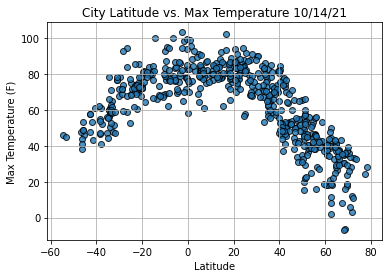

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

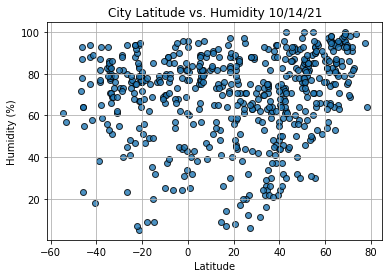

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

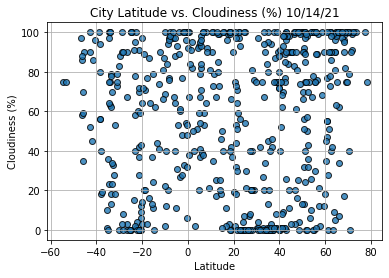

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

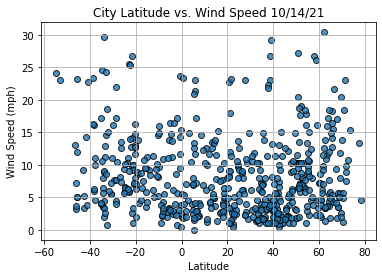

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()